# Decision Tree

Este algoritmo classifica a população em vários conjuntos com base em algumas propriedades (variáveis independentes) da mesma. Geralmente, esse algoritmo é usado para resolver problemas de classificação.

Árvores, de um modo geral em computação, são estruturas de dados formadas por um conjunto de elementos que armazenam informações chamadas nós. Além disso, toda árvore possui um nó chamado raiz, que possui o maior nível hierárquico (o ponto de partida) e ligações para outros elementos, denominados filhos. Esses filhos podem possuir seus próprios filhos que por sua vez também possuem os seus. O nó que não possui filho é conhecido como nó folha ou terminal (representado pelo símbolo arredondado na figura).

Tendo essas definições esclarecidas, uma árvore de decisão nada mais é que uma árvore que armazena regras em seus nós, e os nós folhas representam a decisão a ser tomada (no caso do exemplo, qual jogo escolher).

## Treinando árvore de decisão e gerando lista de acurácia

In [11]:
from sklearn import metrics, tree
import numpy as np
import pandas as pd


data = 'data_set/letter-recognition.data'

colums = [
    'lettr', 'x-box', 'y-box', 'width', 'high', 'onpix', 'x-bar', 'y-bar',
    'x2bar', 'y2bar', 'xybar', 'x2ybr', 'xy2br', 'x-ege', 'xegvy', 'y-ege',
    'yegvx'
]

df = pd.read_csv(data, names=colums)

accuracy_list = list()

# Salvando acurácia em lista, aumentando pontos utilizados para
# treinar de 100 em 100, até chegar em 16000
for training_points_number in range(100, 16001, 100):

    training_points = np.array(df[:training_points_number].drop(['lettr'], 1))
    training_labels = np.array(df[:training_points_number]['lettr'])

    clf = tree.DecisionTreeClassifier()
    clf = clf.fit(training_points, training_labels)
    
    test_points = np.array(df[training_points_number:].drop(['lettr'], 1))
    test_labels = np.array(df[training_points_number:]['lettr'])

    accuracy = clf.score(test_points, test_labels)

    accuracy_list.append(accuracy)
    
print("Acurácia ({} pontos usados para treinar): ".format(training_points_number) + str(accuracy))

Acurácia (16000 pontos usados para treinar): 0.87575


## Gerando gráfico de acurácia

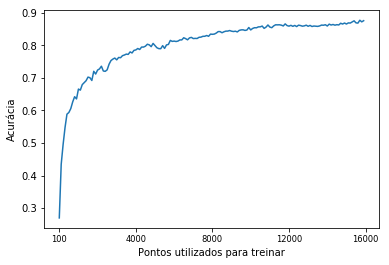

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt

xticks = ['100', '4000', '8000', '12000', '16000']

plt.plot(accuracy_list)
plt.xlabel('Pontos utilizados para treinar')
plt.ylabel('Acurácia')
plt.xticks(range(0, 161, 40), xticks, size='small')
plt.show()

## Gerando relatório com precisão, recall e f1-score

In [13]:
predicted = clf.predict(test_points)

# Gera relatório de classificação
print(metrics.classification_report(test_labels, predicted))

             precision    recall  f1-score   support

          A       0.97      0.91      0.94       156
          B       0.80      0.88      0.84       136
          C       0.89      0.89      0.89       142
          D       0.83      0.88      0.85       167
          E       0.79      0.86      0.83       152
          F       0.85      0.84      0.85       153
          G       0.89      0.80      0.84       164
          H       0.78      0.80      0.79       151
          I       0.91      0.91      0.91       165
          J       0.91      0.91      0.91       148
          K       0.83      0.86      0.84       146
          L       0.90      0.94      0.92       157
          M       0.97      0.93      0.95       144
          N       0.87      0.86      0.86       166
          O       0.79      0.83      0.81       139
          P       0.87      0.85      0.86       168
          Q       0.83      0.81      0.82       168
          R       0.85      0.86      0.85   

## Gerando matriz de confusão

In [14]:
# Gera matriz de confusão
print(metrics.confusion_matrix(test_labels, predicted))

[[142   0   0   1   1   0   1   1   0   1   0   1   1   0   1   0   1   0
    0   0   1   2   0   0   2   0]
 [  0 119   0   3   0   3   1   0   1   1   1   0   0   0   2   1   0   3
    0   0   0   0   0   1   0   0]
 [  2   0 126   0   3   0   2   1   0   0   0   1   0   1   1   0   1   0
    1   0   1   0   1   0   1   0]
 [  0   2   0 147   1   0   1   5   1   0   0   0   0   2   2   0   0   5
    0   0   0   0   0   1   0   0]
 [  0   2   2   0 131   1   3   0   0   0   0   1   0   0   0   1   1   0
    2   0   0   0   0   4   0   4]
 [  0   1   1   0   1 129   0   2   2   0   0   0   0   2   0   9   1   0
    1   0   0   3   0   0   1   0]
 [  0   2   4   1   3   0 132   2   2   0   3   2   0   0   2   2   4   0
    1   1   0   2   0   0   1   0]
 [  0   3   0   2   2   3   1 121   0   2   7   0   1   0   0   2   0   5
    0   2   0   0   0   0   0   0]
 [  0   1   2   0   1   1   0   0 150   1   0   1   0   0   0   0   0   2
    1   0   0   0   0   2   0   3]
 [  0   1   0   1  

## Exportando desenho da árvore de decisão

In [15]:
import graphviz 

feature_names = colums.copy()
feature_names.remove('lettr')

dot_data = tree.export_graphviz(clf, out_file=None, 
                                feature_names=feature_names,  
                                class_names=training_labels,  
                                filled=True, rounded=True,  
                                special_characters=True, rotate=True) 
graph = graphviz.Source(dot_data) 
graph.render("decision_tree")

'decision_tree.pdf'